In [1]:
import matplotlib.pyplot as plt

path = '/var/lib/criu/pageclient.log'

with open(path, 'r') as f:
    log = f.readlines()

In [10]:
time = []
temp_dict = {}
num = 0
for i in range(len(log)):
    if 'read msg:' in log[i]:
        if float(log[i].split()[0][1:-1])>100:
            break
    if 'read msg:' in log[i]:
        if log[i].split()[-1] not in temp_dict.keys():
            temp_dict[log[i].split()[-1]] = float(log[i].split()[0][1:-1])
        continue
    if 'done, addr:' in log[i]:
        pf = log[i].split()[-1][5:]
        t = float(log[i].split()[0][1:-1])
        if pf in temp_dict.keys():
            time.append(t - temp_dict[pf])
            del temp_dict[pf]
print(len(time))

111884


In [5]:
a = '(11.212502) Warn  (criu/transfer.c:328): 75619 done, addr:7f2d2d00b000'
b = '(11.212487) Warn  (criu/transfer.c:270): 75606 read msg: 7f2d2d00b000'
print(a.split()[-1][5:])
print(b.split()[-1])
print(a.split()[0][1:-1])

7f2d2d00b000
7f2d2d00b000
11.212502


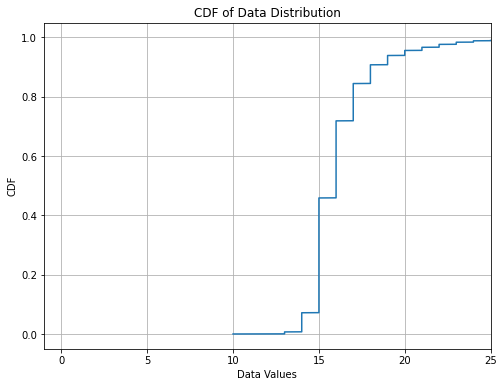

In [11]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array(time) * 1000000

# 将数据排序
sorted_data = np.sort(data)

# 计算 CDF：每个数据点的排名除以数据总数
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# 绘制 CDF 图
plt.figure(figsize=(8, 6))
plt.plot(sorted_data, cdf)
plt.title('CDF of Data Distribution')
plt.xlabel('Data Values')
plt.ylabel('CDF')
plt.xlim(-1, 25)
plt.grid(True)
plt.show()

In [19]:
time = []
last = 0
num = 0
for i in range(len(log)):
    if 'cPF:' in log[i]:
        last = float(log[i].split()[0][1:-1])
        continue
    if 'done, addr:' in log[i]:
        pf = log[i].split()[4][5:]
        t = float(log[i].split()[0][1:-1])
        time.append(t - last)
print(len(time))

260302


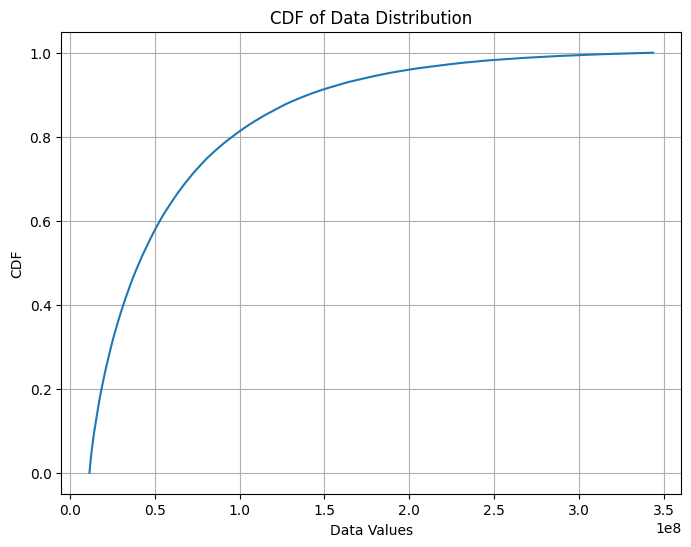

In [20]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array(time) * 1000000

# 将数据排序
sorted_data = np.sort(data)

# 计算 CDF：每个数据点的排名除以数据总数
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# 绘制 CDF 图
plt.figure(figsize=(8, 6))
plt.plot(sorted_data, cdf)
plt.title('CDF of Data Distribution')
plt.xlabel('Data Values')
plt.ylabel('CDF')
# plt.xlim(-5, 200)
plt.grid(True)
plt.show()